# A Semi-automatic Classification of Normal Karyotypes using Convolutional Neural Network Algorithm

- **Chuan Yang**, MD, PhD Student
- Mentor: **Yanyan Zhao**, MD, PhD
- Shengjing Hospital of China Medical University

## Modules

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow import keras

from os import walk

import time
import datetime

%matplotlib inline

## Samples


## Chormosome Label Convert by using Dictionary

In [2]:
chromConvert = {'chr_01': 1, 
               'chr_02': 2, 
               'chr_03': 3, 
               'chr_04': 4, 
               'chr_05': 5, 
               'chr_06': 6, 
               'chr_07': 7, 
               'chr_08': 8, 
               'chr_09': 9, 
               'chr_10': 10, 
               'chr_11': 11, 
               'chr_12': 12, 
               'chr_13': 13, 
               'chr_14': 14, 
               'chr_15': 15, 
               'chr_16': 16, 
               'chr_17': 17, 
               'chr_18': 18, 
               'chr_19': 19, 
               'chr_20': 20, 
               'chr_21': 21, 
               'chr_22': 22, 
               'chr_x': 0, 
               'chr_y': 23, 
                'chr_18_p11_deletion': 24,
                'chr_18_q10_isochromosome': 25,
                'chr_9_inversion': 26,
                'chr_5_p14_deletion': 27,
                'chr_x_isochromosome': 28,
                'chr_x_p22_cnv': 29, 
                'chr_x_q21_cnv': 30,
                'chr_x_q22_deletion': 31
               }

In [3]:
chromConvert_reverse = {1: 'chr_01',
                2: 'chr_02', 
                3: 'chr_03',
                4: 'chr_04',
                5: 'chr_05', 
                6: 'chr_06',
                7: 'chr_07',
                8: 'chr_08',
                9: 'chr_09',
                10: 'chr_10',
                11: 'chr_11',
                12: 'chr_12',
                13: 'chr_13',
                14: 'chr_14',
                15: 'chr_15',
                16: 'chr_16',
                17: 'chr_17',
                18: 'chr_18',
                19: 'chr_19',
                20: 'chr_20', 
                21: 'chr_21', 
                22: 'chr_22', 
                0: 'chr_x', 
                23: 'chr_y', 
                24:  'chr_18_p11_deletion',
                25: 'chr_18_q10_isochromosome',
                26: 'chr_9_inversion',
                27: 'chr_5_p14_deletion',
                28: 'chr_x_isochromosome',
                29: 'chr_x_p22_cnv', 
                30: 'chr_x_q21_cnv',
                31: 'chr_x_q22_deletion'
               }

## File Import

In [4]:
# pathBase = 'C:\\Users\\Chuan\\OneDrive\\Dowrun\\Database\\PhD\\KaryoTypes\\Arrangement\\'
# pathBase = 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement\\'
# pathBase = 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement\\'
# ///////////////////////////////////////////////
# Merged Database

try:
    pathBase = 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\'

except:
    pathBase = 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\'

theWhole = {}


f = []
f_01 = []
mypath_01 = pathBase + 'chr_01'
for (dirpath, dirnames, filenames) in walk(mypath_01):
    f.extend(filenames)
for l in f:
    f_01.append(mypath_01 + '\\' + l) 
        
f = []
f_02 = []
mypath_02 = pathBase + 'chr_02'
for (dirpath, dirnames, filenames) in walk(mypath_02):
    f.extend(filenames)
for l in f:
    f_02.append(mypath_02 + '\\' + l)    
        
f = []
f_03 = []
mypath_03 = pathBase + 'chr_03'
for (dirpath, dirnames, filenames) in walk(mypath_03):
    f.extend(filenames)
for l in f:
    f_03.append(mypath_03 + '\\' + l)    
        
f = []
f_04 = []
mypath_04 = pathBase + 'chr_04'
for (dirpath, dirnames, filenames) in walk(mypath_04):
    f.extend(filenames)
for l in f:
    f_04.append(mypath_04 + '\\' + l)    
        
f = []
f_05 = []
mypath_05 = pathBase + 'chr_05'
for (dirpath, dirnames, filenames) in walk(mypath_05):
    f.extend(filenames)
for l in f:
    f_05.append(mypath_05 + '\\' + l)    
        
f = []
f_06 = []
mypath_06 = pathBase + 'chr_06'
for (dirpath, dirnames, filenames) in walk(mypath_06):
    f.extend(filenames)
for l in f:
    f_06.append(mypath_06 + '\\' + l)    
    
f = []
f_07 = []
mypath_07 = pathBase + 'chr_07'
for (dirpath, dirnames, filenames) in walk(mypath_07):
    f.extend(filenames)
for l in f:
    f_07.append(mypath_07 + '\\' + l)    
        
f = []
f_08 = []
mypath_08 = pathBase + 'chr_08'
for (dirpath, dirnames, filenames) in walk(mypath_08):
    f.extend(filenames)
for l in f:
    f_08.append(mypath_08 + '\\' + l)    
        
f = []
f_09 = []
mypath_09 = pathBase + 'chr_09'
for (dirpath, dirnames, filenames) in walk(mypath_09):
    f.extend(filenames)
for l in f:
    f_09.append(mypath_09 + '\\' + l)    
    
f = []
f_10 = []
mypath_10 = pathBase + 'chr_10'
for (dirpath, dirnames, filenames) in walk(mypath_10):
    f.extend(filenames)
for l in f:
    f_10.append(mypath_10 + '\\' + l)    
    
f = []
f_11 = []
mypath_11 = pathBase + 'chr_11'
for (dirpath, dirnames, filenames) in walk(mypath_11):
    f.extend(filenames)
for l in f:
    f_11.append(mypath_11 + '\\' + l)    
    
    
f = []
f_12 = []
mypath_12 = pathBase + 'chr_12'
for (dirpath, dirnames, filenames) in walk(mypath_12):
    f.extend(filenames)
for l in f:
    f_12.append(mypath_12 + '\\' + l)    
    
    
f = []
f_13 = []
mypath_13 = pathBase + 'chr_13'
for (dirpath, dirnames, filenames) in walk(mypath_13):
    f.extend(filenames)
for l in f:
    f_13.append(mypath_13 + '\\' + l)    
    
    
f = []
f_14 = []
mypath_14 = pathBase + 'chr_14'
for (dirpath, dirnames, filenames) in walk(mypath_14):
    f.extend(filenames)
for l in f:
    f_14.append(mypath_14 + '\\' + l)    
    

    
f = []
f_15 = []
mypath_15 = pathBase + 'chr_15'
for (dirpath, dirnames, filenames) in walk(mypath_15):
    f.extend(filenames)
for l in f:
    f_15.append(mypath_15 + '\\' + l)    
    
        
f = []
f_16 = []
mypath_16 = pathBase + 'chr_16'
for (dirpath, dirnames, filenames) in walk(mypath_16):
    f.extend(filenames)
for l in f:
    f_16.append(mypath_16 + '\\' + l)    
    
        
f = []
f_17 = []
mypath_17 = pathBase + 'chr_17'
for (dirpath, dirnames, filenames) in walk(mypath_17):
    f.extend(filenames)
for l in f:
    f_17.append(mypath_17 + '\\' + l)    
    
        
f = []
f_18 = []
mypath_18 = pathBase + 'chr_18'
for (dirpath, dirnames, filenames) in walk(mypath_18):
    f.extend(filenames)
for l in f:
    f_18.append(mypath_18 + '\\' + l)    
    
        
f = []
f_19 = []
mypath_19 = pathBase + 'chr_19'
for (dirpath, dirnames, filenames) in walk(mypath_19):
    f.extend(filenames)
for l in f:
    f_19.append(mypath_19 + '\\' + l)    
    
        
f = []
f_20 = []
mypath_20 = pathBase + 'chr_20'
for (dirpath, dirnames, filenames) in walk(mypath_20):
    f.extend(filenames)
for l in f:
    f_20.append(mypath_20 + '\\' + l)    
   
        
f = []
f_21 = []
mypath_21 = pathBase + 'chr_21'
for (dirpath, dirnames, filenames) in walk(mypath_21):
    f.extend(filenames)
for l in f:
    f_21.append(mypath_21 + '\\' + l)    
   
        
f = []
f_22 = []
mypath_22 = pathBase + 'chr_22'
for (dirpath, dirnames, filenames) in walk(mypath_22):
    f.extend(filenames)
for l in f:
    f_22.append(mypath_22 + '\\' + l)    
   
f = []
f_x = []
mypath_x = pathBase + 'chr_x'
for (dirpath, dirnames, filenames) in walk(mypath_x):
    f.extend(filenames)
for l in f:
    f_x.append(mypath_x + '\\' + l)    
   
f = []
f_y = []
mypath_y = pathBase + 'chr_y'
for (dirpath, dirnames, filenames) in walk(mypath_y):
    f.extend(filenames)
for l in f:
    f_y.append(mypath_y + '\\' + l)  
    
# ///////// Abnormal ones //////////////

f = []
f_18_p11_deletion = []
mypath_18_p11_deletion = pathBase + 'chr_18_p11_deletion'
for (dirpath, dirnames, filenames) in walk(mypath_18_p11_deletion):
    f.extend(filenames)
for l in f:
    f_18_p11_deletion.append(mypath_18_p11_deletion + '\\' + l)  


f = []
f_18_q10_isochromosome = []
mypath_18_q10_isochromosome = pathBase + 'chr_18_q10_isochromosome'
for (dirpath, dirnames, filenames) in walk(mypath_18_q10_isochromosome):
    f.extend(filenames)
for l in f:
    f_18_q10_isochromosome.append(mypath_18_q10_isochromosome + '\\' + l)  
    
# ///////// Abnormal ones //////////////

f = []
f_9_inversion = []
mypath_9_inversion = pathBase + 'chr_9_inversion'
for (dirpath, dirnames, filenames) in walk(mypath_9_inversion):
    f.extend(filenames)
for l in f:
    f_9_inversion.append(mypath_9_inversion + '\\' + l)  
    

f = []
f_5_p14_deletion = []
mypath_5_p14_deletion = pathBase + 'chr_5_p14_deletion'
for (dirpath, dirnames, filenames) in walk(mypath_5_p14_deletion):
    f.extend(filenames)
for l in f:
    f_5_p14_deletion.append(mypath_5_p14_deletion + '\\' + l)  
    

f = []
f_x_isochromosome = []
mypath_x_isochromosome = pathBase + 'chr_x_isochromosome'
for (dirpath, dirnames, filenames) in walk(mypath_x_isochromosome):
    f.extend(filenames)
for l in f:
    f_x_isochromosome.append(mypath_x_isochromosome + '\\' + l)  
    
    
f = []
f_x_p22_cnv = []
mypath_x_p22_cnv = pathBase + 'chr_x_p22_cnv'
for (dirpath, dirnames, filenames) in walk(mypath_x_p22_cnv):
    f.extend(filenames)
for l in f:
    f_x_p22_cnv.append(mypath_x_p22_cnv + '\\' + l)
    
    
f = []
f_x_q21_cnv = []
mypath_x_q21_cnv = pathBase + 'chr_x_q21_cnv'
for (dirpath, dirnames, filenames) in walk(mypath_x_q21_cnv):
    f.extend(filenames)
for l in f:
    f_x_q21_cnv.append(mypath_x_q21_cnv + '\\' + l)  
    
    
f = []
f_x_q22_deletion = []
mypath_x_q22_deletion = pathBase + 'chr_x_q22_deletion'
for (dirpath, dirnames, filenames) in walk(mypath_x_q22_deletion):
    f.extend(filenames)
for l in f:
    f_x_q22_deletion.append(mypath_x_q22_deletion + '\\' + l)      

    
theWhole['chr_01'] = f_01
theWhole['chr_02'] = f_02
theWhole['chr_03'] = f_03
theWhole['chr_04'] = f_04
theWhole['chr_05'] = f_05
theWhole['chr_06'] = f_06
theWhole['chr_07'] = f_07
theWhole['chr_08'] = f_08
theWhole['chr_09'] = f_09
theWhole['chr_10'] = f_10
theWhole['chr_11'] = f_11
theWhole['chr_12'] = f_12
theWhole['chr_13'] = f_13
theWhole['chr_14'] = f_14
theWhole['chr_15'] = f_15
theWhole['chr_16'] = f_16
theWhole['chr_17'] = f_17
theWhole['chr_18'] = f_18
theWhole['chr_19'] = f_19
theWhole['chr_20'] = f_20
theWhole['chr_21'] = f_21
theWhole['chr_22'] = f_22
theWhole['chr_x'] = f_x
theWhole['chr_y'] = f_y

theWhole['chr_18_p11_deletion'] = f_18_p11_deletion
theWhole['chr_18_q10_isochromosome'] = f_18_q10_isochromosome

theWhole['chr_9_inversion'] = f_9_inversion

theWhole['chr_5_p14_deletion'] = f_5_p14_deletion    

theWhole['chr_x_isochromosome'] = f_x_isochromosome
theWhole['chr_x_p22_cnv'] = f_x_p22_cnv
theWhole['chr_x_q21_cnv'] = f_x_q21_cnv
theWhole['chr_x_q22_deletion'] = f_x_q22_deletion

In [5]:
theWhole['chr_x']

['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-10L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-11L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-12L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-13L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-14L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-15L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-16L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-17L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-18L.bmp',
 'D:\\Users\\Chuan\

In [6]:
type(theWhole['chr_x'])

list

In [7]:
len(theWhole)

32

In [8]:
type(theWhole)

dict

In [9]:
theWhole.keys()

dict_keys(['chr_01', 'chr_02', 'chr_03', 'chr_04', 'chr_05', 'chr_06', 'chr_07', 'chr_08', 'chr_09', 'chr_10', 'chr_11', 'chr_12', 'chr_13', 'chr_14', 'chr_15', 'chr_16', 'chr_17', 'chr_18', 'chr_19', 'chr_20', 'chr_21', 'chr_22', 'chr_x', 'chr_y', 'chr_18_p11_deletion', 'chr_18_q10_isochromosome', 'chr_9_inversion', 'chr_5_p14_deletion', 'chr_x_isochromosome', 'chr_x_p22_cnv', 'chr_x_q21_cnv', 'chr_x_q22_deletion'])

## Cross Validation

### KFold

#### Let's say split every class into 7 folds

In [10]:
kfold = KFold(7, True, 1)

# 分成7个子集，每次6个子集用于训练，1个子集用于测试

In [11]:
X_train_name = {}
X_test_name = {}

for chrNo in theWhole.keys():

    X_train_name[chrNo] = {}
    X_test_name[chrNo] = {}

    split_method_number = 0

    generator_kFold = kfold.split(theWhole[chrNo])
    
    print('Chromosome/Abnormality: ', chrNo)

    for train, test in generator_kFold:    

        print('Split Method No. ', split_method_number)

        print('Train: ', train, 'Test: ', test, '\n')

        # train和test的值是7个split分法的每个分法的list

        X_train_name[chrNo][split_method_number] = []
        X_test_name[chrNo][split_method_number] = []




        for split_method_train in train:

            # split_method_train的值是每个split方法，其值为图像序号
            X_train_name[chrNo][split_method_number].append(theWhole[chrNo][split_method_train])


        for split_method_test in test:

            # split_method_test的值是每个split方法，其值为图像序号
            X_test_name[chrNo][split_method_number].append(theWhole[chrNo][split_method_test])

        split_method_number = split_method_number + 1

Chromosome/Abnormality:  chr_01
Split Method No.  0
Train:  [ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 20 21 22 23 24 25
 27 28 29 30 31 32 35 36 37 38 39 41 42 43 45 46 47 48 49 50 51 52 53 56
 57 58 59 61 62 63 64 65 66 67 68 70 71 72] Test:  [10 19 26 33 34 40 44 54 55 60 69] 

Split Method No.  1
Train:  [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 28 29 30 31 32 33 34 36 37 38 40 41 42 44 45 46 48 49 50 51 52 54 55
 56 57 58 60 61 62 63 64 65 66 68 69 70 72] Test:  [ 2 15 27 35 39 43 47 53 59 67 71] 

Split Method No.  2
Train:  [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24 25
 26 27 28 29 30 32 33 34 35 37 39 40 41 42 43 44 45 46 47 48 49 50 51 53
 54 55 59 60 61 62 63 64 66 67 69 70 71 72] Test:  [ 3 21 31 36 38 52 56 57 58 65 68] 

Split Method No.  3
Train:  [ 1  2  3  4  5  6  9 10 11 12 13 14 15 16 18 19 20 21 22 23 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 47 49 50 51 52 53 54 55
 56 57 5

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guid

In [12]:
len(X_train_name['chr_01'])

7

In [13]:
len(X_train_name['chr_01'][0])

62

In [14]:
len(X_test_name['chr_01'][0])

11

In [15]:
X_train_name['chr_01'][1]

['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21000~A.0001.K.jpg.1L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21001~A.0008.K.1L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21002~A.0024.K.jpg.1L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21002~A.0024.K.jpg.1R.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21008~A.0008.K.jpg.1L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21008~A.0008.K.jpg.1R.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21011~A.0008.K.1L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21011~A.0008.K.1R.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21012~A.0019.K.1L.bmp',
 'D:\\Users\\Chuan\\Docume

In [16]:
X_test_name['chr_01'][1]

['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21001~A.0008.K.1R.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21025~A.0002.K.jpg.1L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21570~A.0001.K.jpg.1L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21588~A.0001.K.jpg.1L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21890~A.0005.K.jpg.1L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21902~A.0010.K.jpg.1L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21906~A.0011.K.jpg.1L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W22451~A.0011.K.jpg.1L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W22670~A.0006.K.jpg.1L.bmp',
 'D:\\Users\\C

In [17]:
X_train_name

{'chr_01': {0: ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21000~A.0001.K.jpg.1L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21001~A.0008.K.1L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21001~A.0008.K.1R.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21002~A.0024.K.jpg.1L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21002~A.0024.K.jpg.1R.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21008~A.0008.K.jpg.1L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21008~A.0008.K.jpg.1R.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21011~A.0008.K.1L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21011~A.0008.K.1R.b

# Image Input

## Training Data

In [18]:
start = time.time()

image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_train_name[chrNo][0]:
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)
    
end = time.time()
print(end - start)

1.1389961242675781


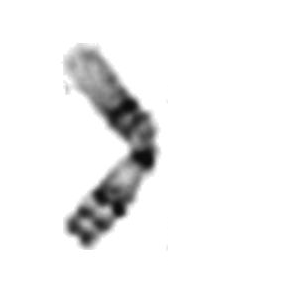

In [19]:
image['chr_01'][1]

### Functions

In [20]:
def extractData(image):
    x = image.size[0]
    y = image.size[1]
    
    matrix = []
    rgb_matrix = []

    for i in range(x):
        matrix.append([])
        rgb_matrix.append([])
        
        for j in range(y):
            r, g, b = image.getpixel((j, i))            
            value = r * 299.0/1000 + g * 587.0/1000 + b * 114.0/1000
            value = int(value)
            matrix[i].append(value)
            rgb_matrix[i].append((r,g,b))
    return matrix, rgb_matrix

In [21]:
def imageReconstruct(matrix):
    df = np.array(matrix, dtype=np.uint8)
    img = Image.fromarray(df, 'RGB')
    img.save('image.png')
    return img

### Data Extraction from Images

In [22]:
start = time.time()

data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)
        
end = time.time()
print(end - start)

252.73087310791016


In [23]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_train_list = []
y_train_list = []

for y, x in array.items():    
    for x_item in x:
        x_train_list.append(x_item)
        y_train_list.append(y)

## Validation Data

In [24]:
start = time.time()

image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_test_name[chrNo][0]:
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)
    
end = time.time()
print(end - start)

0.2552917003631592


In [25]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [26]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_test_list = []
y_test_list = []

for y, x in array.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

## ChromConvert

In [27]:
y_train_digital_list = []
for item in y_train_list:
    y_train_digital_list.append(chromConvert[item])
    
y_test_digital_list = []
for item in y_test_list:
    y_test_digital_list.append(chromConvert[item])

# Numpy Array

In [28]:
X_train = np.array(x_train_list)
y_train = np.array(y_train_digital_list)

In [29]:
X_test = np.array(x_test_list)
y_test = np.array(y_test_digital_list)

In [30]:
y_test

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17,
       17, 17, 17, 17, 17

In [31]:
len(X_train)

2449

In [32]:
X_train[0].shape

(300, 300)

# Convolutional Neural Network

## Data Preparation

In [33]:
X_train = X_train.reshape(-1, 300, 300, 1)
X_test = X_test.reshape(-1, 300, 300, 1)

## Training

### Model

In [34]:
model = Sequential()

In [35]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

In [36]:
model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(600, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(32, activation='softmax'))

### Tensorboard Initilization

In [37]:
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

#### Compile the modal

In [38]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Training

In [39]:
model.fit(X_train, y_train, epochs=400, batch_size=64, verbose=1, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback])

Epoch 1/400
39/39 [==============================] - 9s 158ms/step - loss: 10.9351 - accuracy: 0.0710 - val_loss: 3.4591 - val_accuracy: 0.0240
Epoch 2/400
39/39 [==============================] - 5s 119ms/step - loss: 3.2784 - accuracy: 0.0931 - val_loss: 18.8518 - val_accuracy: 0.1127
Epoch 3/400
39/39 [==============================] - 5s 117ms/step - loss: 3.8599 - accuracy: 0.1123 - val_loss: 3.4234 - val_accuracy: 0.1103
Epoch 4/400
39/39 [==============================] - 5s 117ms/step - loss: 3.4127 - accuracy: 0.1131 - val_loss: 3.3086 - val_accuracy: 0.1007
Epoch 5/400
39/39 [==============================] - 5s 117ms/step - loss: 3.0342 - accuracy: 0.1686 - val_loss: 2.9187 - val_accuracy: 0.2062
Epoch 6/400
39/39 [==============================] - 5s 131ms/step - loss: 3.2812 - accuracy: 0.2368 - val_loss: 3.3592 - val_accuracy: 0.1175
Epoch 7/400
39/39 [==============================] - 5s 117ms/step - loss: 3.5964 - accuracy: 0.1156 - val_loss: 3.3432 - val_accuracy: 0.11

Epoch 58/400
39/39 [==============================] - 5s 134ms/step - loss: 1.5812 - accuracy: 0.5043 - val_loss: 1.6407 - val_accuracy: 0.5396
Epoch 59/400
39/39 [==============================] - 5s 124ms/step - loss: 1.1056 - accuracy: 0.6386 - val_loss: 1.5072 - val_accuracy: 0.5755
Epoch 60/400
39/39 [==============================] - 5s 139ms/step - loss: 3.8332 - accuracy: 0.5419 - val_loss: 3.3771 - val_accuracy: 0.0456
Epoch 61/400
39/39 [==============================] - 5s 119ms/step - loss: 3.3239 - accuracy: 0.1086 - val_loss: 3.3284 - val_accuracy: 0.1223
Epoch 62/400
39/39 [==============================] - 5s 119ms/step - loss: 3.1880 - accuracy: 0.1335 - val_loss: 3.3764 - val_accuracy: 0.1439
Epoch 63/400
39/39 [==============================] - 5s 119ms/step - loss: 2.8477 - accuracy: 0.2360 - val_loss: 2.7844 - val_accuracy: 0.2542
Epoch 64/400
39/39 [==============================] - 5s 122ms/step - loss: 2.0471 - accuracy: 0.3883 - val_loss: 2.3134 - val_accuracy:

Epoch 115/400
39/39 [==============================] - 5s 118ms/step - loss: 2.5177 - accuracy: 0.2924 - val_loss: 4.1944 - val_accuracy: 0.1535
Epoch 116/400
39/39 [==============================] - 5s 116ms/step - loss: 2.4110 - accuracy: 0.3218 - val_loss: 4.4648 - val_accuracy: 0.1319
Epoch 117/400
39/39 [==============================] - 5s 116ms/step - loss: 2.3397 - accuracy: 0.3283 - val_loss: 3.9913 - val_accuracy: 0.1463
Epoch 118/400
39/39 [==============================] - 5s 122ms/step - loss: 2.3048 - accuracy: 0.3397 - val_loss: 5.3537 - val_accuracy: 0.1511
Epoch 119/400
39/39 [==============================] - 5s 116ms/step - loss: 2.2764 - accuracy: 0.3516 - val_loss: 4.5926 - val_accuracy: 0.1511
Epoch 120/400
39/39 [==============================] - 5s 120ms/step - loss: 2.1835 - accuracy: 0.3867 - val_loss: 4.3160 - val_accuracy: 0.1631
Epoch 121/400
39/39 [==============================] - 5s 119ms/step - loss: 2.1667 - accuracy: 0.3773 - val_loss: 4.6305 - val_ac

39/39 [==============================] - 5s 118ms/step - loss: 0.1682 - accuracy: 0.9628 - val_loss: 7.3438 - val_accuracy: 0.4700
Epoch 172/400
39/39 [==============================] - 5s 116ms/step - loss: 0.1562 - accuracy: 0.9653 - val_loss: 7.5861 - val_accuracy: 0.4748
Epoch 173/400
39/39 [==============================] - 5s 116ms/step - loss: 0.1490 - accuracy: 0.9633 - val_loss: 6.7736 - val_accuracy: 0.4868
Epoch 174/400
39/39 [==============================] - 5s 116ms/step - loss: 0.2123 - accuracy: 0.9579 - val_loss: 5.7637 - val_accuracy: 0.4772
Epoch 175/400
39/39 [==============================] - 5s 116ms/step - loss: 0.4921 - accuracy: 0.9179 - val_loss: 6.1289 - val_accuracy: 0.5156
Epoch 176/400
39/39 [==============================] - 5s 116ms/step - loss: 0.3018 - accuracy: 0.9261 - val_loss: 5.6260 - val_accuracy: 0.4748
Epoch 177/400
39/39 [==============================] - 5s 116ms/step - loss: 0.1931 - accuracy: 0.9514 - val_loss: 7.6090 - val_accuracy: 0.4892

39/39 [==============================] - 5s 132ms/step - loss: 0.0074 - accuracy: 0.9963 - val_loss: 11.9626 - val_accuracy: 0.5755
Epoch 228/400
39/39 [==============================] - 5s 130ms/step - loss: 0.0049 - accuracy: 0.9984 - val_loss: 12.4865 - val_accuracy: 0.5707
Epoch 229/400
39/39 [==============================] - 5s 131ms/step - loss: 0.0046 - accuracy: 0.9971 - val_loss: 13.2916 - val_accuracy: 0.5731
Epoch 230/400
39/39 [==============================] - 5s 131ms/step - loss: 0.0384 - accuracy: 0.9927 - val_loss: 9.9582 - val_accuracy: 0.5276
Epoch 231/400
39/39 [==============================] - 5s 131ms/step - loss: 0.0378 - accuracy: 0.9914 - val_loss: 9.6011 - val_accuracy: 0.5492
Epoch 232/400
39/39 [==============================] - 5s 131ms/step - loss: 0.0411 - accuracy: 0.9898 - val_loss: 10.3614 - val_accuracy: 0.5468
Epoch 233/400
39/39 [==============================] - 5s 132ms/step - loss: 0.0111 - accuracy: 0.9955 - val_loss: 11.2043 - val_accuracy: 0

39/39 [==============================] - 5s 131ms/step - loss: 0.0022 - accuracy: 0.9980 - val_loss: 15.7367 - val_accuracy: 0.5827
Epoch 284/400
39/39 [==============================] - 5s 131ms/step - loss: 0.0020 - accuracy: 0.9980 - val_loss: 15.7580 - val_accuracy: 0.5827
Epoch 285/400
39/39 [==============================] - 5s 131ms/step - loss: 0.0021 - accuracy: 0.9988 - val_loss: 15.8112 - val_accuracy: 0.5851
Epoch 286/400
39/39 [==============================] - 5s 131ms/step - loss: 0.0021 - accuracy: 0.9984 - val_loss: 15.8158 - val_accuracy: 0.5851
Epoch 287/400
39/39 [==============================] - 5s 132ms/step - loss: 0.0020 - accuracy: 0.9976 - val_loss: 15.8172 - val_accuracy: 0.5827
Epoch 288/400
39/39 [==============================] - 5s 132ms/step - loss: 0.0019 - accuracy: 0.9988 - val_loss: 15.9271 - val_accuracy: 0.5851
Epoch 289/400
39/39 [==============================] - 5s 132ms/step - loss: 0.0020 - accuracy: 0.9984 - val_loss: 15.9864 - val_accuracy:

39/39 [==============================] - 6s 148ms/step - loss: 0.4997 - accuracy: 0.8567 - val_loss: 3.3778 - val_accuracy: 0.5036
Epoch 340/400
39/39 [==============================] - 5s 131ms/step - loss: 0.5509 - accuracy: 0.8493 - val_loss: 3.0693 - val_accuracy: 0.5779
Epoch 341/400
39/39 [==============================] - 5s 131ms/step - loss: 0.3407 - accuracy: 0.8889 - val_loss: 4.4181 - val_accuracy: 0.5971
Epoch 342/400
39/39 [==============================] - 5s 131ms/step - loss: 0.3077 - accuracy: 0.8865 - val_loss: 3.8803 - val_accuracy: 0.5755
Epoch 343/400
39/39 [==============================] - 5s 131ms/step - loss: 0.2113 - accuracy: 0.9110 - val_loss: 4.6067 - val_accuracy: 0.5875
Epoch 344/400
39/39 [==============================] - 5s 132ms/step - loss: 0.2105 - accuracy: 0.9245 - val_loss: 4.4211 - val_accuracy: 0.5683
Epoch 345/400
39/39 [==============================] - 5s 131ms/step - loss: 0.1909 - accuracy: 0.9294 - val_loss: 5.3482 - val_accuracy: 0.6091

39/39 [==============================] - 5s 132ms/step - loss: 0.0721 - accuracy: 0.9820 - val_loss: 8.3838 - val_accuracy: 0.6355
Epoch 396/400
39/39 [==============================] - 5s 130ms/step - loss: 0.1261 - accuracy: 0.9845 - val_loss: 5.9530 - val_accuracy: 0.6091
Epoch 397/400
39/39 [==============================] - 5s 130ms/step - loss: 0.0500 - accuracy: 0.9857 - val_loss: 4.7818 - val_accuracy: 0.6139
Epoch 398/400
39/39 [==============================] - 5s 135ms/step - loss: 0.0279 - accuracy: 0.9910 - val_loss: 5.1397 - val_accuracy: 0.6139
Epoch 399/400
39/39 [==============================] - 5s 131ms/step - loss: 0.0692 - accuracy: 0.9914 - val_loss: 4.8305 - val_accuracy: 0.5995
Epoch 400/400
39/39 [==============================] - 5s 130ms/step - loss: 0.0772 - accuracy: 0.9833 - val_loss: 6.0781 - val_accuracy: 0.5899


In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 322624)            0         
_________________________________________________________________
dense (Dense)                (None, 300)               9

### Tensorboard Display

In [41]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 19276), started 7 days, 6:33:53 ago. (Use '!kill 19276' to kill it.)

## Performance Measures

In [42]:
#y_predict = clf.predict(X_test)
#y_test = y_test

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.590


In [43]:
len(X_test)

417

In [44]:
y_predict = model.predict(X_test)

In [45]:
len(y_predict)

417

In [46]:
# The number 32 means the type number of all chromosome class number inlcuding abnormal ones
y_predict_filtered = []

for sample in y_predict:
    maximum = 0
    indicator = 0
    for i in range(32):
        if sample[i] > maximum:
            maximum = sample[i]
            indicator = i
    y_predict_filtered.append(indicator)        

### Confusion Matrix (混淆矩阵)

In [47]:
label = ['chr_01', 'chr_02', 'chr_03',  'chr_04', 'chr_05', 'chr_06', 'chr_07',  'chr_08',  'chr_09', 'chr_10',
'chr_11', 'chr_12', 'chr_13', 'chr_14', 'chr_15',  'chr_16', 'chr_17', 'chr_18', 'chr_19',  'chr_20',  
'chr_21', 'chr_22', 'chr_x', 'chr_y',  'chr_18_p11_deletion', 'chr_18_q10_isochromosome', 
'chr_9_inversion', 'chr_5_p14_deletion', 
'chr_x_isochromosome', 'chr_x_p22_cnv', 'chr_x_q21_cnv',  'chr_x_q22_deletion']

label_convert = []

for i in range(32):
    label_convert.append(chromConvert_reverse[i])

In [48]:
label_convert

['chr_x',
 'chr_01',
 'chr_02',
 'chr_03',
 'chr_04',
 'chr_05',
 'chr_06',
 'chr_07',
 'chr_08',
 'chr_09',
 'chr_10',
 'chr_11',
 'chr_12',
 'chr_13',
 'chr_14',
 'chr_15',
 'chr_16',
 'chr_17',
 'chr_18',
 'chr_19',
 'chr_20',
 'chr_21',
 'chr_22',
 'chr_y',
 'chr_18_p11_deletion',
 'chr_18_q10_isochromosome',
 'chr_9_inversion',
 'chr_5_p14_deletion',
 'chr_x_isochromosome',
 'chr_x_p22_cnv',
 'chr_x_q21_cnv',
 'chr_x_q22_deletion']

In [49]:
cm = np.array(confusion_matrix(y_test, y_predict_filtered, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ,
                                                                   10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 
                                                                  20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
                                                                  30, 31]))
confusion = pd.DataFrame(cm, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_KaryoType_CNN.csv')
confusion

,chr_x,chr_01,chr_02,chr_03,chr_04,chr_05,chr_06,chr_07,chr_08,chr_09,...,chr_22,chr_y,chr_18_p11_deletion,chr_18_q10_isochromosome,chr_9_inversion,chr_5_p14_deletion,chr_x_isochromosome,chr_x_p22_cnv,chr_x_q21_cnv,chr_x_q22_deletion
chr_x,8,0,0,0,1,0,0,3,0,5,...,0,0,0,0,3,0,0,2,0,4
chr_01,0,5,0,0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_02,0,0,8,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_03,0,0,0,9,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
chr_04,0,0,0,0,7,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
chr_05,0,0,0,0,0,21,0,0,0,1,...,0,0,0,0,2,5,0,0,0,0
chr_06,0,0,0,0,0,0,8,0,0,0,...,0,0,0,1,0,0,0,0,1,0
chr_07,0,0,0,0,0,0,1,3,1,4,...,0,0,0,0,0,0,0,0,0,0
chr_08,1,0,0,0,0,0,0,0,5,2,...,0,0,0,0,1,0,0,0,0,0
chr_09,4,0,0,0,0,3,0,0,1,30,...,0,0,0,0,7,0,0,0,1,1


In [50]:
print(classification_report(y_test, y_predict_filtered, target_names=label_convert))

                          precision    recall  f1-score   support

                   chr_x       0.42      0.30      0.35        27
                  chr_01       1.00      0.45      0.62        11
                  chr_02       1.00      0.80      0.89        10
                  chr_03       1.00      0.90      0.95        10
                  chr_04       0.44      0.70      0.54        10
                  chr_05       0.68      0.72      0.70        29
                  chr_06       0.89      0.80      0.84        10
                  chr_07       0.43      0.30      0.35        10
                  chr_08       0.62      0.45      0.53        11
                  chr_09       0.51      0.64      0.57        47
                  chr_10       0.88      0.70      0.78        10
                  chr_11       0.45      0.50      0.48        10
                  chr_12       0.78      0.70      0.74        10
                  chr_13       0.67      0.40      0.50        10
         

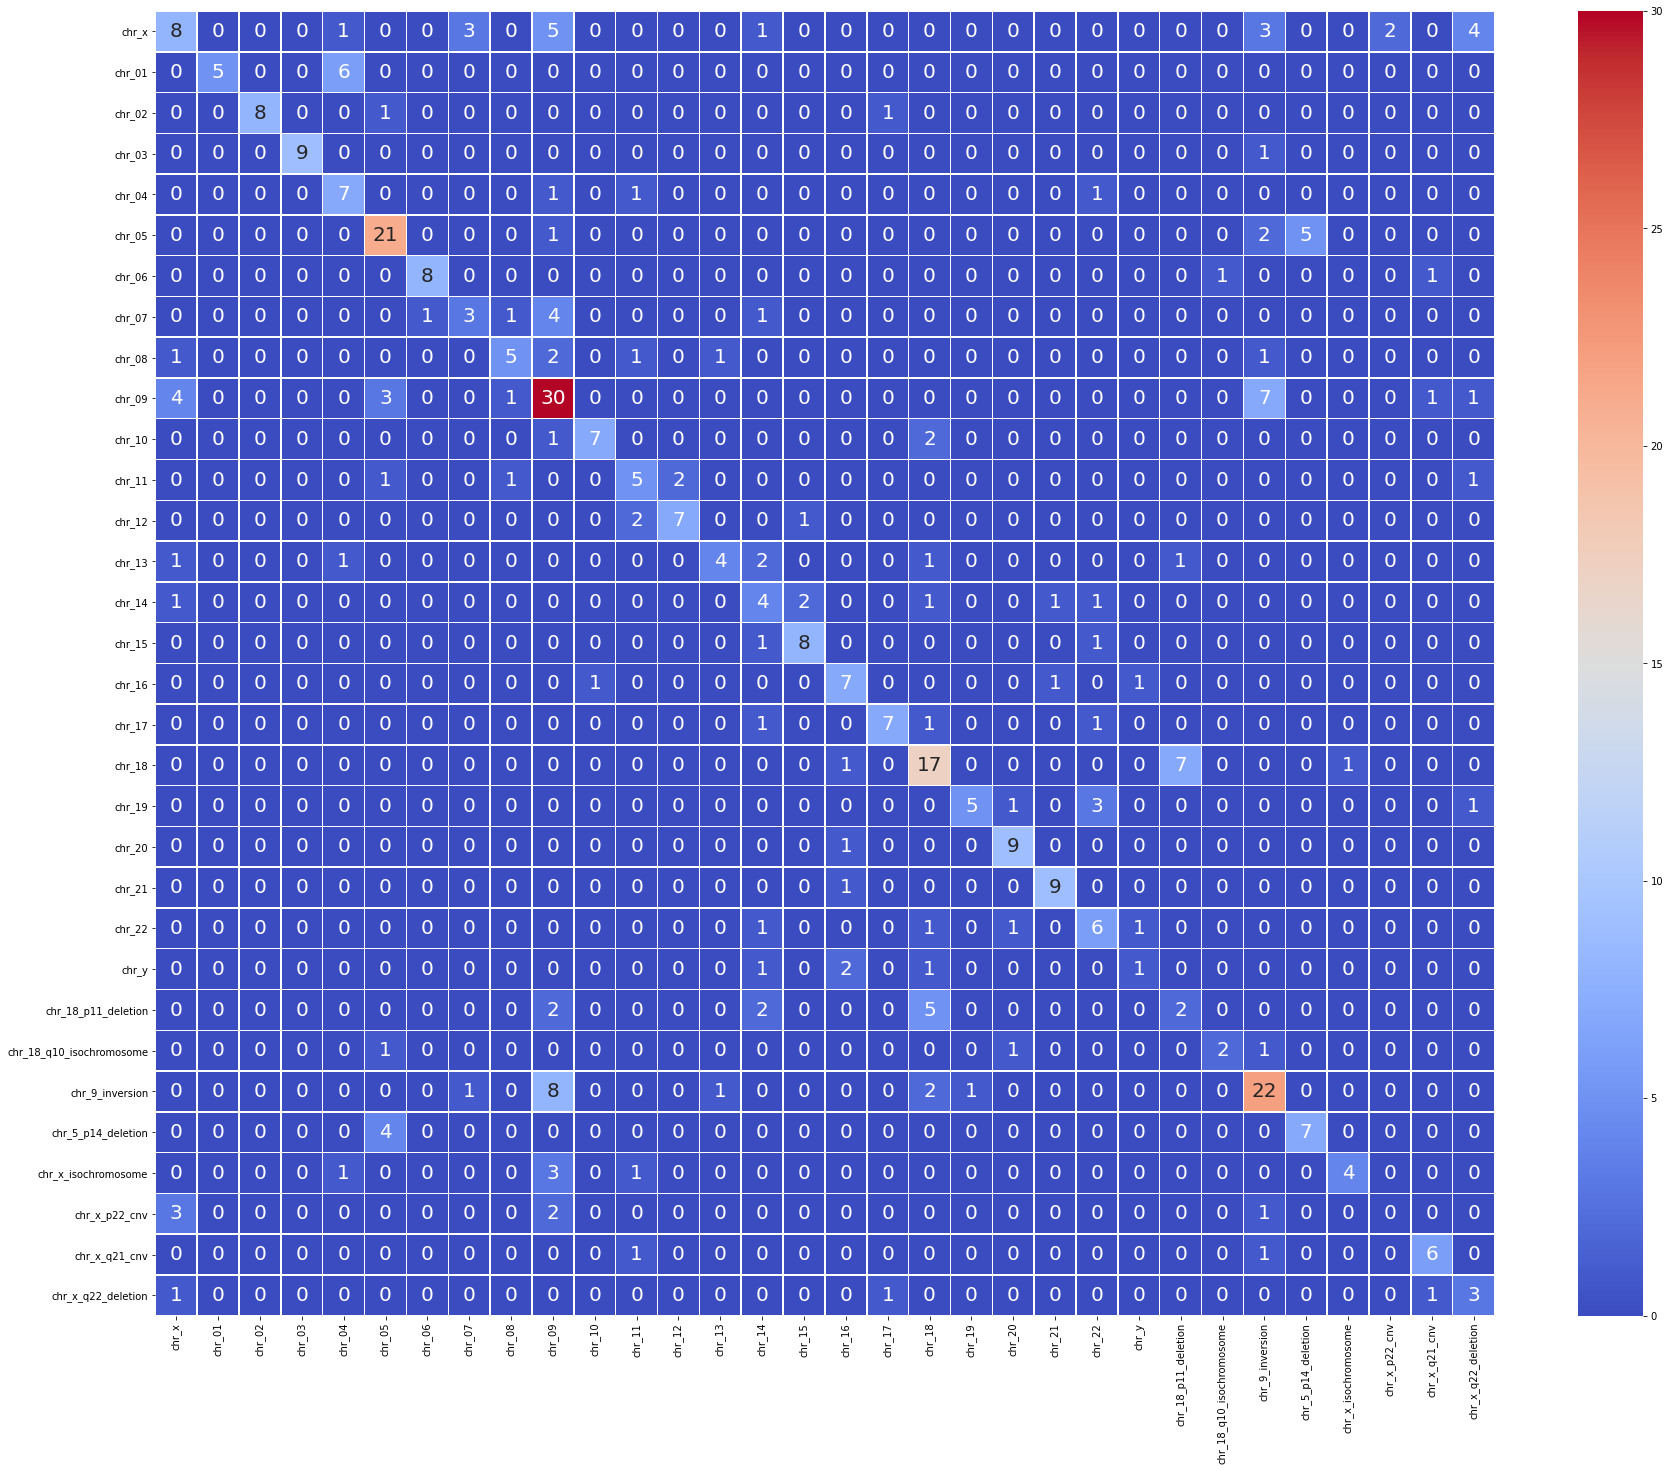

In [51]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True, 
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})